# Load the combined dataframe, and do some plotting 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read in the data
df = pd.read_csv("processed_data/sales_and_weather_2021-2022.csv")
df = df.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df


,date,day_of_week,month,year,week_of_year,Getränke_sales,Getränke_count,Coffee_sales,Coffee_count,Cappuccino_sales,...,precipitation,temperature_mean,temperature_max,temperature_min,sunshine_duration,cloud_cover,wind_speed,humidity,pressure,snow_depth
0,2021-01-02,Saturday,January,2021,53,692.9,486,596.4,183,230.4,...,8.0,0.0,10.0,-16.0,0.0,8.0,22.0,89.0,10127.0,0.0
1,2021-01-04,Monday,January,2021,1,429.2,297,371.9,117,192.0,...,0.0,0.0,9.0,-9.0,0.0,8.0,21.0,89.0,10134.0,0.0
2,2021-01-05,Tuesday,January,2021,1,392.8,309,378.0,117,144.0,...,10.0,5.0,11.0,-4.0,0.0,8.0,22.0,92.0,10125.0,0.0
3,2021-01-07,Thursday,January,2021,1,493.2,290,414.2,128,179.2,...,1.0,3.0,13.0,-10.0,0.0,8.0,15.0,89.0,10153.0,3.0
4,2021-01-08,Friday,January,2021,1,557.5,350,483.5,150,185.6,...,0.0,0.0,11.0,-19.0,1.0,7.0,20.0,84.0,10163.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2022-09-26,Monday,September,2022,39,882.0,338,799.4,235,190.4,...,33.0,113.0,159.0,67.0,36.0,NaN,28.0,78.0,10082.0,NaN
606,2022-09-27,Tuesday,September,2022,39,817.1,327,742.0,214,136.0,...,59.0,94.0,125.0,68.0,27.0,NaN,43.0,81.0,10012.0,NaN
607,2022-09-28,Wednesday,September,2022,39,847.2,373,778.6,228,142.8,...,10.0,93.0,120.0,56.0,4.0,NaN,26.0,83.0,9995.0,NaN
608,2022-09-29,Thursday,September,2022,39,954.0,378,882.9,254,163.2,...,0.0,90.0,135.0,44.0,11.0,NaN,10.0,81.0,10030.0,NaN


In [29]:
def plot_correlation(df, weather_variable, sales_variable, condition, condition_value, ax, color=None):
    df= df[df[condition] == condition_value]
    ax.scatter(df[weather_variable] / 10, df[sales_variable], color=color, s=10)

    X = df[weather_variable].values.reshape(-1, 1) / 10
    y = df[sales_variable].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    ax.plot(X, reg.predict(X), color="black")
    corr = df[sales_variable].corr(df[weather_variable])
    ax.set_title(f"{condition_value}, Corr={corr.round(2)}", fontsize=10)

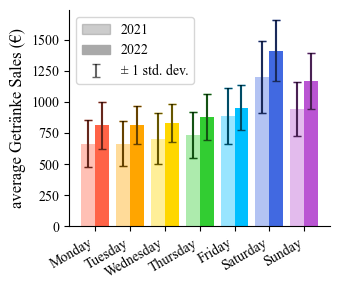

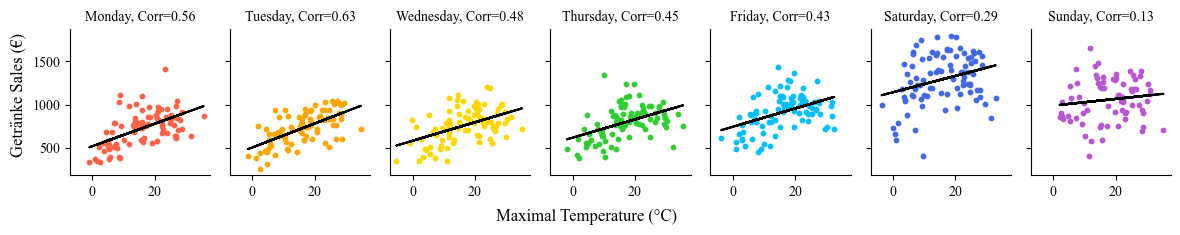

In [30]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_colors = ["tomato", "orange", "gold", "limegreen", "deepskyblue", "royalblue", "mediumorchid"]

# change the font for the whole plot
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3), sharey=True, sharex=True)
ax.set_ylabel("average Getränke Sales (€)", fontsize=12, x=-0.0, y=0.5)

width = 0.4
for i, day in enumerate(days):
    ax.bar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width, alpha=0.4, )
    ax.bar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width)
    # add the standard deviation as error bars
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6, label = "2021")
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6)
    #ax[int(year) - 2021].set_ylim(0, 1600)
    # turn the x-axis labels 45 degrees
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
        tick.set_horizontalalignment("right")
    # use the day names as x-axis labels
    ax.set_xticks(np.arange(1, 8))
    ax.set_xticklabels(days)
    
t = ["2021", "2022", "± 1 std. dev."]

handles, labels = ax.get_legend_handles_labels()
# change the color of handels[0] to black

leg = ax.legend(handles[:3], t)
leg.legendHandles[0].set_color('grey')
leg.legendHandles[1].set_color('darkgrey')
# remove the right and top border of the fig
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tight_layout()
plt.show()


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(12, 2.5), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors[i])
    #axes[i].set_ylim(0, 2200)
    #axes[i].set_yticks(np.arange(0, 2500, 500))
    #axes[i].set_xlim(-7, 37)
    #axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()







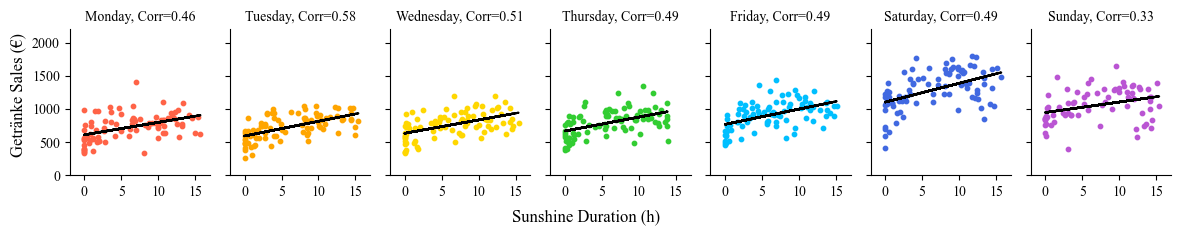

In [14]:
weather_variable = "sunshine_duration"

sales_variable = "Coffee_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(12, 2.5), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Sunshine Duration (h)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-2, 17)
    axes[i].set_xticks(np.arange(0, 20, 5))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()

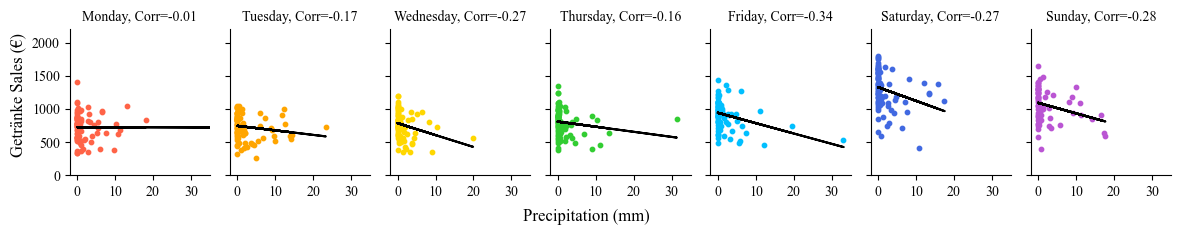

In [15]:
weather_variable = "precipitation"

sales_variable = "Coffee_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(12, 2.5), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Precipitation (mm)", fontsize=12, x=0.5, y=0.08)
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-2, 35)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()

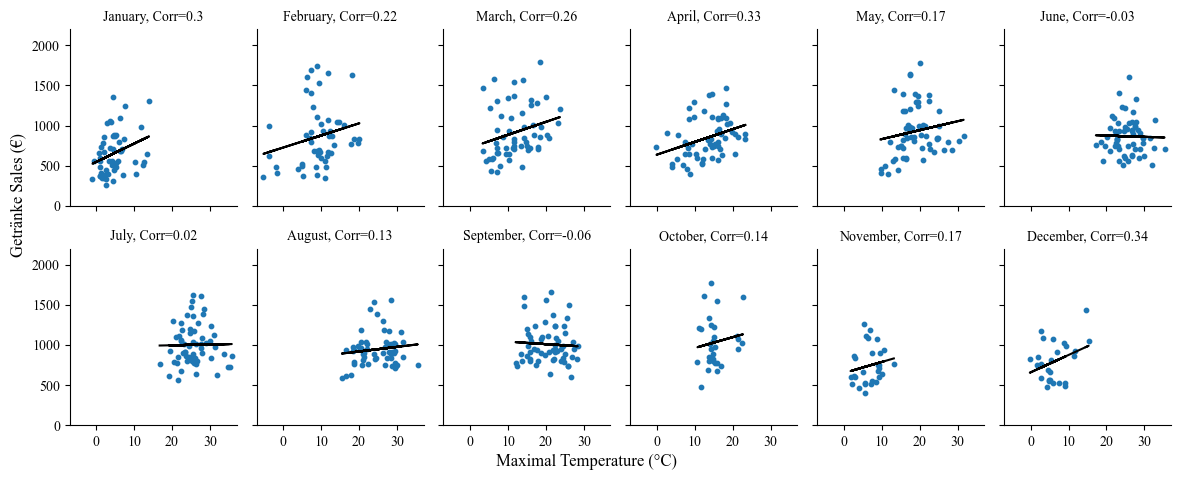

In [16]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"

# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(12, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-7, 37)
    axes[j,i].set_xticks(np.arange(0, 40, 10))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()



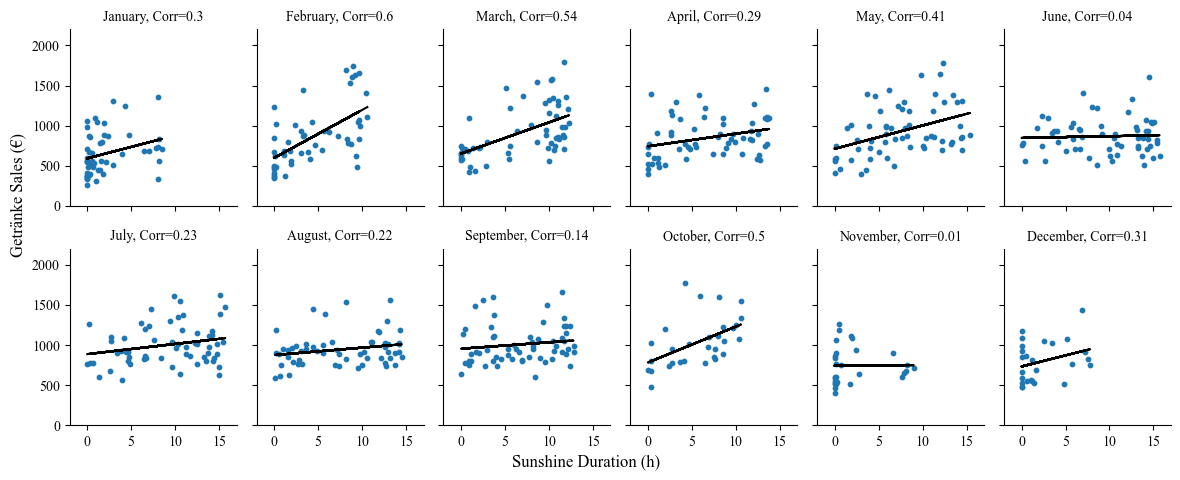

In [17]:
weather_variable = "sunshine_duration"

sales_variable = "Coffee_sales"
# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(12, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Sunshine Duration (h)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-2, 17)
    axes[j,i].set_xticks(np.arange(0, 20, 5))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()


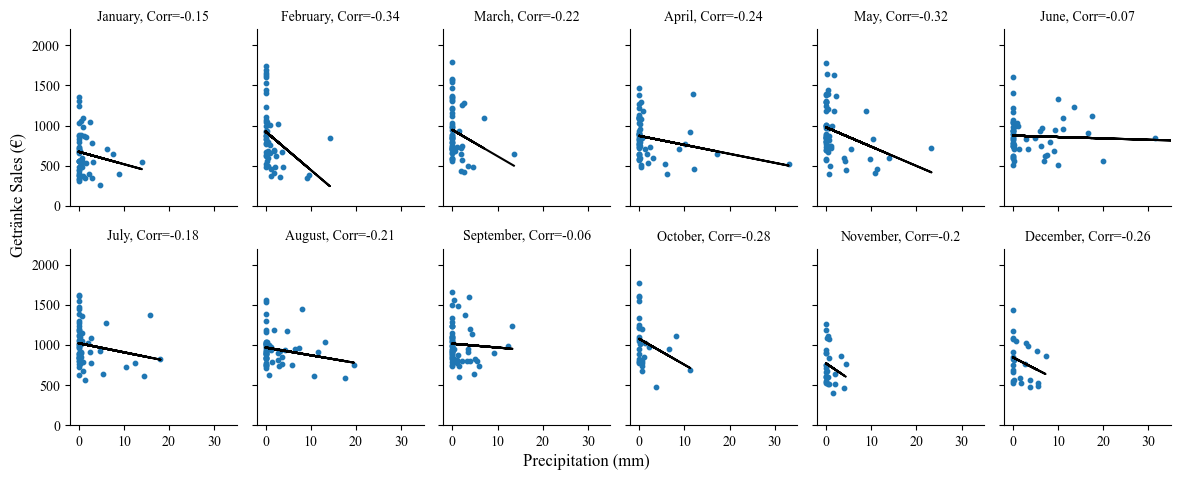

In [18]:
weather_variable = "precipitation"

sales_variable = "Coffee_sales"
# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(12, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Precipitation (mm)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-2, 35)
    axes[j,i].set_xticks(np.arange(0, 40, 10))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()

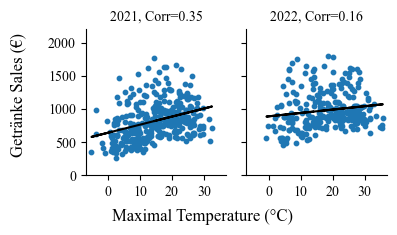

In [19]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"

# Plot the correlation between the max temperature and the sales for each year
fig, axes = plt.subplots(1, 2, figsize=(4, 2.5), sharey=True, sharex=True, frameon=True)
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08)
for i, year in enumerate(df["year"].unique()):
    plot_correlation(df, weather_variable, sales_variable, "year", year, axes[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()

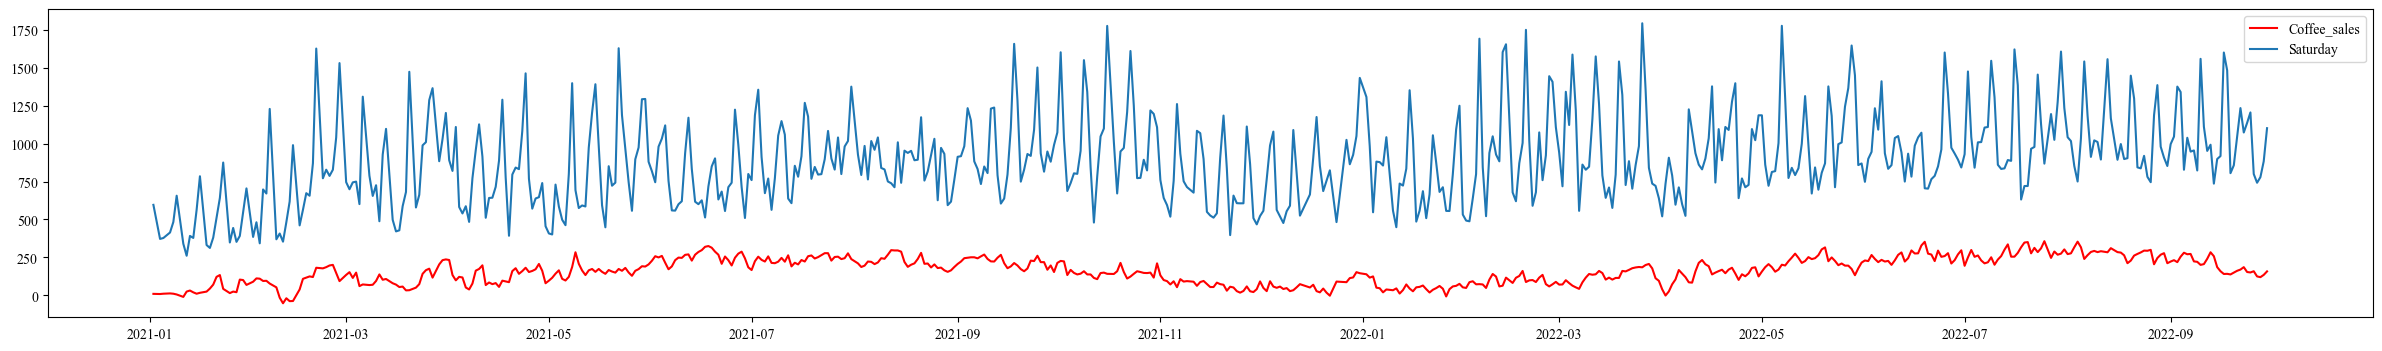

In [21]:
fig, ax = plt.subplots(figsize=(30, 4))

# add a vline where the day of the week is Saturday
#ax.vlines(df[df["day_of_week"] == "Saturday"]["date"].astype("datetime64"), 0, 2000, colors='lightgrey')
# add the lineplot for the sun hours
#ax.plot(df["date"].astype("datetime64"), df["sunshine_duration"].astype("float")*8, color="green")
# add the lineplot for the temperature
ax.plot(df["date"].astype("datetime64"), df["temperature_max"].astype("float"), color="red") 

ax.plot(df["date"].astype("datetime64"), df["Coffee_sales"].astype("float"))
ax.legend(["Coffee_sales", "Saturday"])

In [ ]:
# print the day where the sales were the highest
print("The day with the highest sales was {}".format(df["date"][df["Getränke_sales"].idxmax()]))
# which weekday was this?
print("This was a {}".format(df["day_of_week"][df["Getränke_sales"].idxmax()]))

<function matplotlib.pyplot.show(close=None, block=None)>

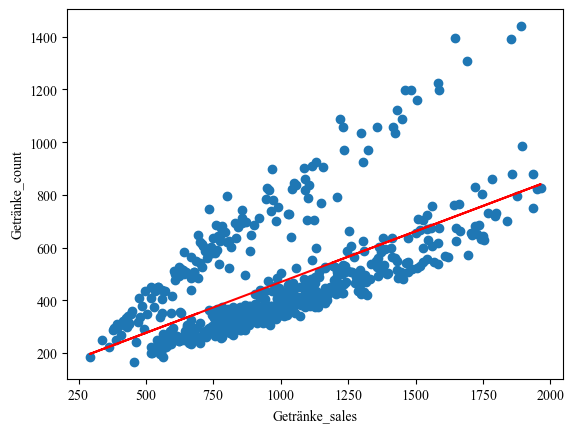

In [25]:
# plot the correlation between sales and precipitation
plt.scatter(df["Getränke_sales"], df["Getränke_count"])
plt.xlabel("Getränke_sales")
plt.ylabel("Getränke_count")
X = df["Getränke_sales"].values.reshape(-1, 1)
y = df["Getränke_count"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.show

In [ ]:
# plot the correlation between sales and sunshine
plt.scatter(df["sunshine_duration"], df["Getränke_sales"])
plt.xlabel("Sunshine Duration")
plt.ylabel("Sales")
X = df["sunshine_duration"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.title("R^2 = {}".format(reg.score(X, y)))
plt.show()

In [ ]:
# calculate the correlation between sales and mean temperature
corr = df["Getränke_sales"].corr(df["temperature_mean"])
print("Correlation between sales and mean temperature: {:.2f}".format(corr))

corr = df["Getränke_sales"].corr(df["temperature_min"])
print("Correlation between sales and min temperature: {:.2f}".format(corr))

corr = df["Getränke_sales"].corr(df["temperature_max"])
print("Correlation between sales and max temperature: {:.2f}".format(corr))

# 

